In [47]:
import numpy
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from src.utils.misc import init_notebook

In [9]:
init_notebook()

Generator(PCG64) at 0x7F2D93C97AE0

In [21]:
img = Image.open("data/raw/new/3.png").convert("L")

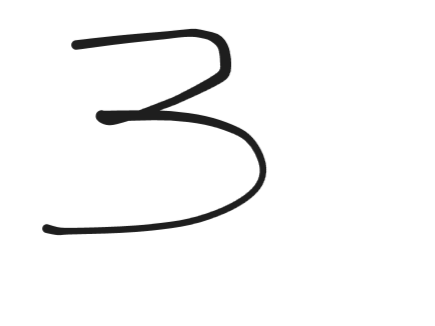

In [68]:
img

In [50]:
img_mini = ImageOps.invert(img).resize((28, 28))
img_mini

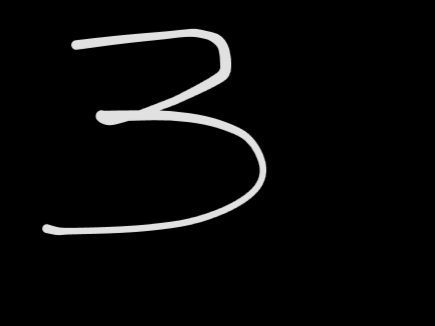

In [32]:
img_grey = Image.eval(img, lambda x: 255 - x)
img_grey

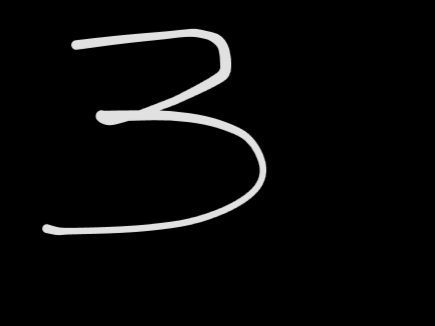

In [33]:
img_grey = ImageOps.invert(img)
img_grey

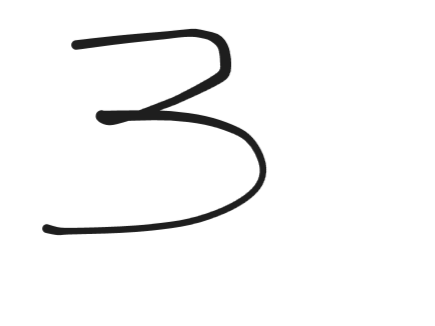

In [34]:
img.crop(img.getbbox())

In [51]:
def crop_image(img: Image.Image) -> Image.Image:
    bbox = img.getbbox()
    return img.crop(bbox)

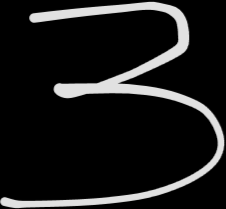

In [52]:
crop_image(img_grey)

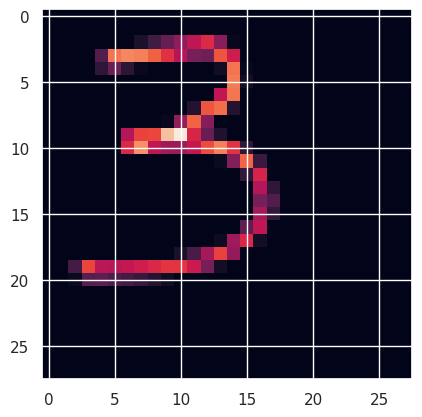

In [53]:
plt.imshow(img_mini)

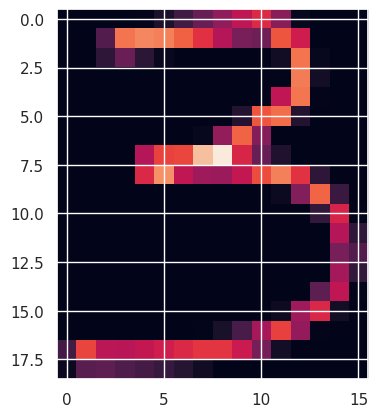

In [54]:
plt.imshow(crop_image(img_mini))

In [59]:
tmp_image = crop_image(img_mini).resize((28, 28))

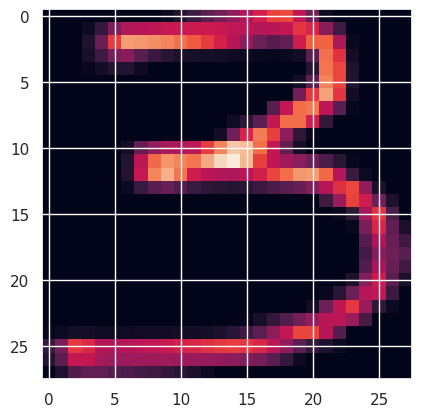

In [60]:
plt.imshow(tmp_image)

In [67]:
type(img), type(img_mini)

(PIL.Image.Image, PIL.Image.Image)

In [69]:
def pad_image(img: Image.Image, padding: int = 4) -> Image.Image:
    new_width = img.width + 2*padding
    new_height = img.height + 2*padding

    img_padded = Image.new("L", (new_width, new_height), 0)
    img_padded.paste(img, (padding, padding))

    return img_padded


In [97]:
padding = 30  # MNIST a environ 2 à 4 pixels de marge sur 28x28

# Nouvelle taille avec padding
new_width = tmp_image.width + 2*padding
new_height = tmp_image.height + 2*padding

# Créer une nouvelle image noire et coller le chiffre au centre
img_padded = Image.new("L", (new_width, new_height), 0)  # fond noir
img_padded.paste(tmp_image, (padding, padding))

# Redimensionner ensuite à 28x28 pour le CNN
img_28x28 = img_padded.resize((28, 28), Image.Resampling.LANCZOS)
img_28x28

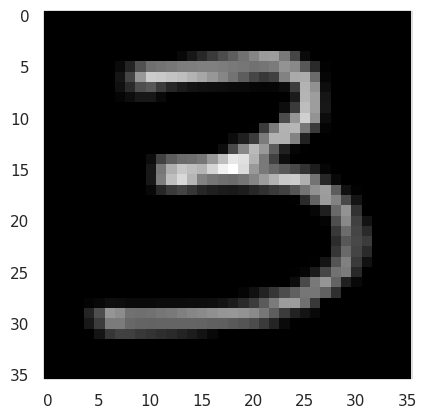

In [77]:
plt.grid(False)
plt.imshow(pad_image(tmp_image), cmap="grey")

In [98]:
def turn_to_mnist(img: Image.Image) -> Image.Image:
    img_inverted = ImageOps.invert(img)
    img_cropped = crop_image(img_inverted)
    img_resized = img_cropped.resize((28, 28), Image.Resampling.LANCZOS)
    img_padded = pad_image(img_resized)
    img_resized = img_padded.resize((28, 28), Image.Resampling.LANCZOS)

    return img_resized

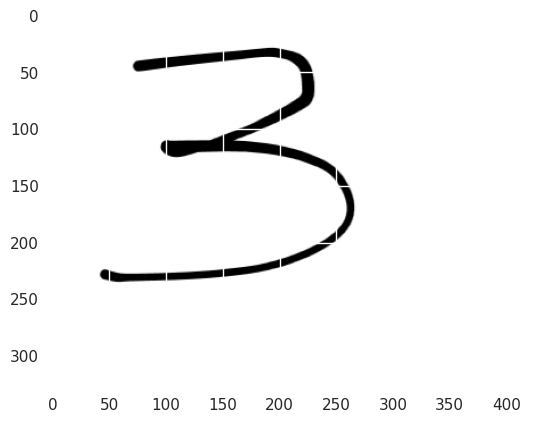

In [99]:
plt.imshow(img, cmap="grey")

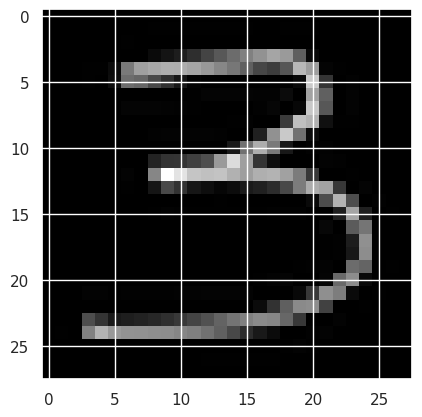

In [100]:
plt.imshow(turn_to_mnist(img), cmap="grey")

In [102]:
import cv2

In [103]:
mnist = turn_to_mnist(img)

In [104]:
import numpy as np

In [107]:
kernel = np.ones((2,2), np.uint8)

# Dilater le chiffre
dilated = cv2.dilate(np.array(mnist), kernel, iterations=1)

# Reconvertir en PIL
img_dilated = Image.fromarray(dilated)
img_dilated

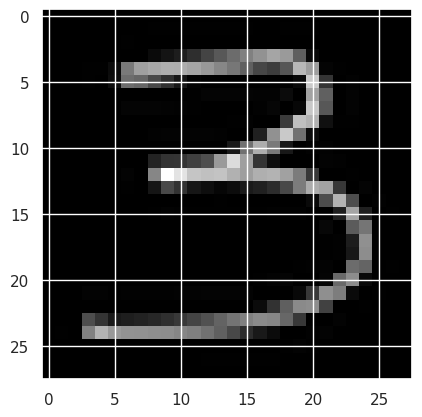

In [110]:
plt.imshow(mnist, cmap="grey")


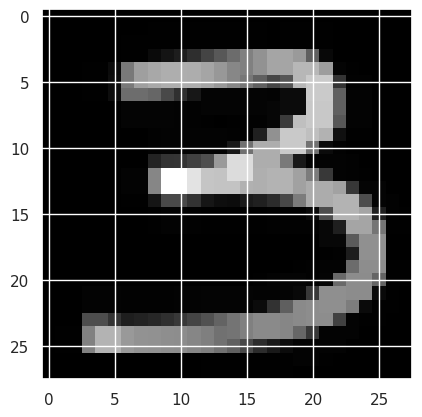

In [111]:

plt.imshow(img_dilated, cmap="grey")

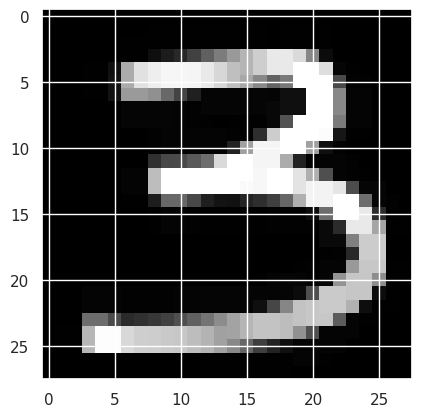

In [119]:
plt.imshow(ImageOps.autocontrast(img_dilated, cutoff=5), cmap="grey")
# todo: use gamma correction instead